# Markov Chain Monte Carlo for Classical Ising Model

In this notebook, we utilize Markov Chain Monte Carlo (MCMC) method to solve the classical 2D Ising model.

Specifically, the model we are interested in is a classical ising model on a $L \times L$ square lattice with periodic boundary condition in both directions.

The Hamiltonian is as follows:
$$
H = -J\sum_{\langle i, j \rangle}\sigma_i \sigma_j + B\sum_i \sigma_i,
$$
where $\sigma_i\in\{1, -1\}$ and we set $J=1, B=0$.

# State Initialization

To implement MCMC, we first initiate the state to be a random state.

In [1]:
import numpy as np
np.random.seed(42)

def get_init_state(L):
    """
    Returns the initial state of the system and site number N = L * L
    """
    return np.random.choice([-1, 1], size=(L, L)), L * L

# Energy Difference

Next, we need the energy difference of a given random move.

In [2]:
def energy_diff(state, site):
    """
    Returns the energy increase if the spin at the given site is flipped
    """
    L = len(state)
    energy = 0
    # Add up the nearest neighbours
    for shift in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        i, j = (site[0] + shift[0]) % L, (site[1] + shift[1]) % L
        energy += state[i, j] * state[site] * 2
    return energy

# MCMC

Now we implement the iteration process of MCMC.

In [6]:
def MCMC_iter(state, T):
    """
    Returns a new state sampled from the Metropolis algorithm
    """
    L = len(state)
    site = (np.random.randint(L), np.random.randint(L))
    delta_E = energy_diff(state, site)
    if delta_E <= 0 or np.random.random() < np.exp(-delta_E / T):
        state[site] *= -1
    return state

# Observable

To extract information from the state, we need to calculate observables.

In [4]:
def energy(state):
    """
    Returns the total energy of the system
    """
    L = len(state)
    energy = 0
    for i in range(L):
        for j in range(L):
            energy += state[i, j] * state[(i + 1) % L, j]
            energy += state[i, j] * state[i, (j + 1) % L]
    return energy

def magnetization(state):
    """
    Returns the total magnetization of the system
    """
    return np.sum(state)

# Demo

Now we assemble all the above parts and plot the average energy, average magnetization, specific heat, and magnetic susceptibility as functions of temperature $T$.

Furthermore, we can examine the critical exponents.

L = 8, n_iter 100000 MCMC done!
L = 16, n_iter 100000 MCMC done!


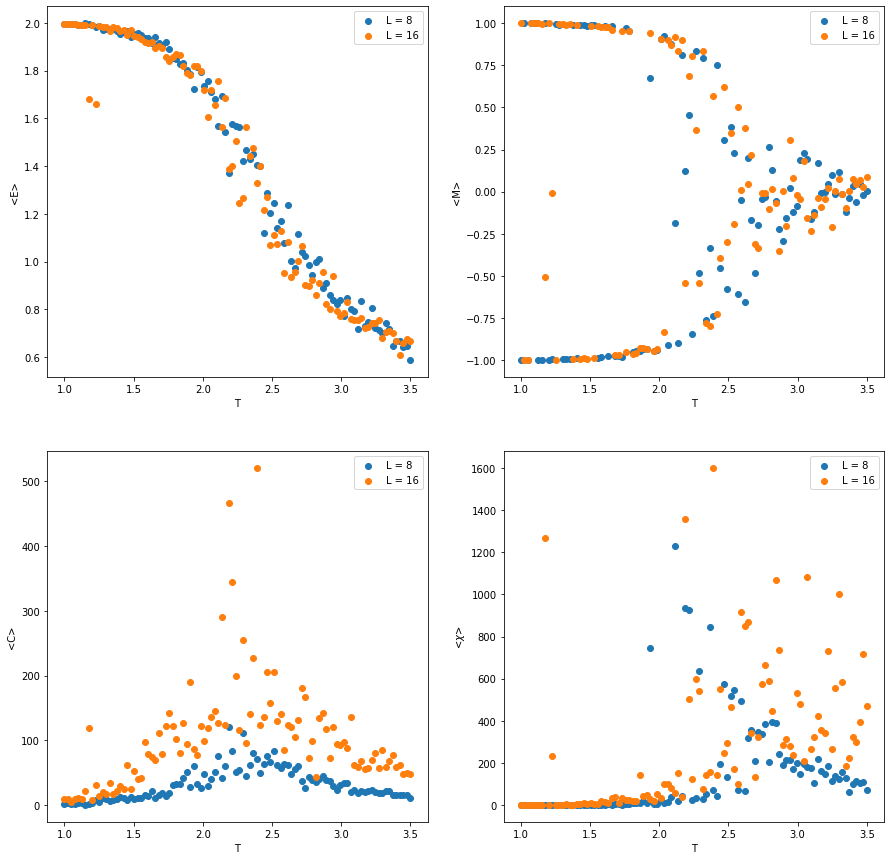

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def MCMC(L, T, n_iter, n_avg=10000):
    """
    Returns the final state of the system after n_iter MCMC steps, and calculates observables
    """
    state, N = get_init_state(L)

    energies = []
    for _ in range(n_iter):
        state = MCMC_iter(state, T)
        energies.append(energy(state))
        if _ >= n_iter/10 and np.abs(np.mean(energies[_-n_iter/100:_] - energies[_-2*n_iter/100-1:_-n_iter/100])) < 1e-7:
            break

    energies = []
    magnetizations = []
    for _ in range(n_avg*10):
        state = MCMC_iter(state, T)
        sample_energy = energy(state)
        sample_magnetization = magnetization(state)
        energies.append(sample_energy)
        magnetizations.append(sample_magnetization)
        
    subsample_energies = np.random.choice(energies, size=n_avg)
    subsample_magnetizations = np.random.choice(magnetizations, size=n_avg)
    avg_energy = np.mean(subsample_energies) / N
    avg_magnetization = np.mean(subsample_magnetizations) / N
    specific_heat = np.var(subsample_energies) / (T ** 2)
    susceptibility = np.var(subsample_magnetizations) / T

    return state, N, avg_energy, avg_magnetization, specific_heat, susceptibility

n_iter = 100000
L_list = [8, 16]
T_list = np.linspace(1, 3.5, 100)

# initialize the figure
fig = plt.figure(figsize=(15, 15))
ax_energy = fig.add_subplot(221)
ax_energy.set_xlabel('T')
ax_energy.set_ylabel('<E>')
ax_magnetization = fig.add_subplot(222)
ax_magnetization.set_xlabel('T')
ax_magnetization.set_ylabel('<M>')
ax_specific_heat = fig.add_subplot(223)
ax_specific_heat.set_xlabel('T')
ax_specific_heat.set_ylabel('<C>')
ax_susceptibility = fig.add_subplot(224)
ax_susceptibility.set_xlabel('T')
ax_susceptibility.set_ylabel(r'<$\chi$>')

# MCMC
for L in L_list:
    avg_energies=[]
    avg_magnetizations=[]
    specific_heats=[]
    susceptibilities=[]
    for T in T_list:
        state, N, avg_energy, avg_magnetization, specific_heat, susceptibility = MCMC(L, T, n_iter)
        avg_energies.append(avg_energy)
        avg_magnetizations.append(avg_magnetization)
        specific_heats.append(specific_heat)
        susceptibilities.append(susceptibility)

    print(f'L = {L}, n_iter {n_iter} MCMC done!')
    # plot
    ax_energy.scatter(T_list, avg_energies, label=f'L = {L}')
    ax_magnetization.scatter(T_list, avg_magnetizations, label=f'L = {L}')
    ax_specific_heat.scatter(T_list, specific_heats, label=f'L = {L}')
    ax_susceptibility.scatter(T_list, susceptibilities, label=f'L = {L}')

ax_energy.legend()
ax_magnetization.legend()
ax_specific_heat.legend()
ax_susceptibility.legend()
plt.show()

We can also examine the critical exponents.